# SD212: Graph mining
## Lab 3: PageRank

In this lab, you will learn to compute, use and interpret various [PageRank](https://en.wikipedia.org/wiki/PageRank) scores.

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse


In [3]:
from sknetwork.data import load_netset, linear_graph, miserables
from sknetwork.linalg import normalize
from sknetwork.ranking import PageRank, BiPageRank, top_k
from sknetwork.visualization import svg_graph

## Data

We will work on the following graphs (see the [NetSets](https://graphs.telecom-paristech.fr/Home_page.html#netsets-section) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution is uniform over the set of nodes.

## Linear graph

Consider a linear graph:

* What are the two best ranked nodes? Try with different values of $\alpha$ and interpret the results.

top 2 nodes  [8 1]


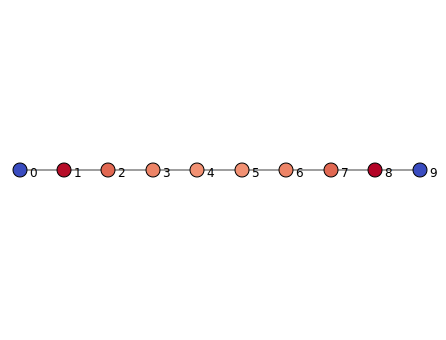

In [5]:
n = 10
graph = linear_graph(n, True)
adjacency = graph.adjacency
position = graph.position
pagerank = PageRank(damping_factor=0.85, solver='lanczos')
scores = pagerank.fit_transform(adjacency)
image = svg_graph(adjacency, position, names=np.arange(n), scores=scores)
print("top 2 nodes ", top_k(scores, 2))
SVG(image)

* What is the exact PageRank vector when $\alpha=1$? You need to compute it!

In [6]:
#here the example graph in undirected and alpha=1 means pure random walk (we dont have sinks)
#=> we have exact solution: pi proportional to d.T
n = 10
graph = linear_graph(n, True)
adjacency = graph.adjacency
d=adjacency.dot(np.ones(n))
pi=d/np.sum(d)
print(pi)

[0.05555556 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111 0.05555556]


## Les Misérables


In [7]:
graph = miserables(True)
adjacency_weighted = graph.adjacency
adjacency = adjacency_weighted > 0
position = graph.position
names = graph.names


* Show the graph with PageRank scores.<br>
**Hint:** Use the log of the scores for better visualization.
* List the 10 best ranked characters.
* Compare with:
    1. the 10 nodes of highest degrees,
    2. the 10 nodes of highest weights,
    3. the 10 most frequent nodes under neighbor sampling.
* Try different values of $\alpha$ (e.g., 0.1, 0.9, 0.99) and interpret the results.

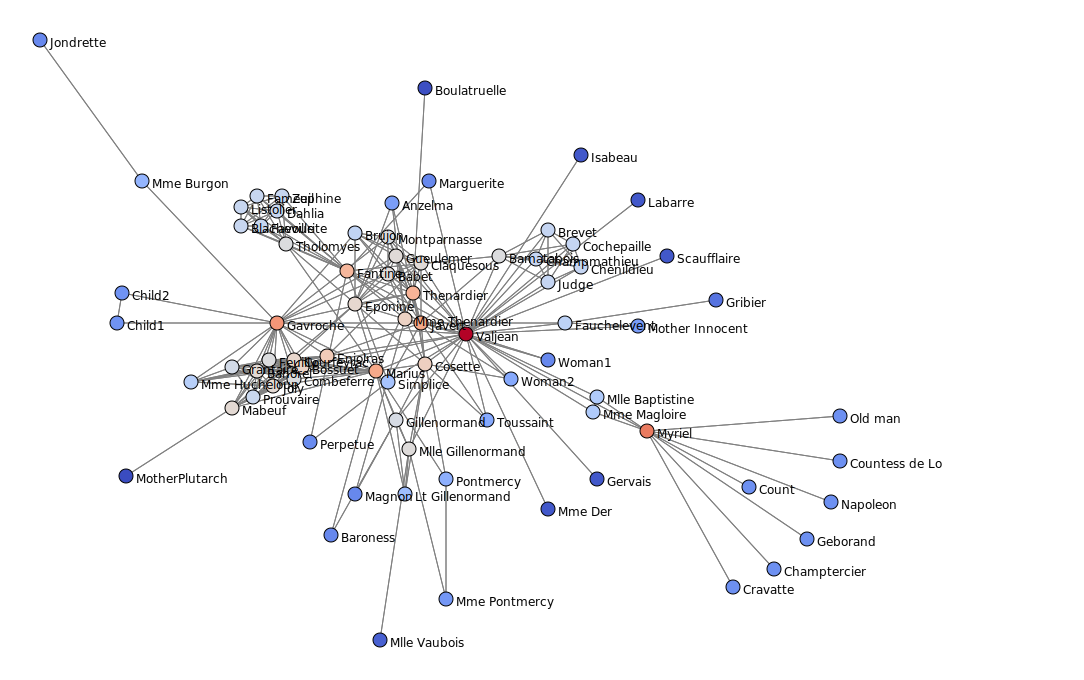

In [8]:
#show graph with pagerank scores
pagerank = PageRank(damping_factor=0.85, solver='lanczos')
scores = np.log(pagerank.fit_transform(adjacency))
image = svg_graph(adjacency, position, names, scale=2, scores=scores)
SVG(image)

In [9]:
#10 best ranked charachters
print("10 best ranked nodes ", names[top_k(scores, 10)])
#10 nodes of highest degress
d = adjacency.dot(np.ones(adjacency.shape[0]))
print("\n10 nodes of highest degrees", names[top_k(d, 10)])
#10 nodes of highest weights
d = adjacency_weighted.dot(np.ones(adjacency_weighted.shape[0]))
print("\n10 nodes of highest weights ", names[top_k(d, 10)])

10 best ranked nodes  ['Valjean' 'Myriel' 'Gavroche' 'Marius' 'Javert' 'Thenardier' 'Fantine'
 'Enjolras' 'Cosette' 'Mme Thenardier']

10 nodes of highest degrees ['Valjean' 'Gavroche' 'Marius' 'Javert' 'Thenardier' 'Enjolras' 'Fantine'
 'Bossuet' 'Courfeyrac' 'Joly']

10 nodes of highest weights  ['Valjean' 'Marius' 'Enjolras' 'Courfeyrac' 'Cosette' 'Combeferre'
 'Bossuet' 'Thenardier' 'Gavroche' 'Fantine']


In [10]:
#10 most frequent nodes under neighbor samplin are:
#10 best ranked nodes with pagerank when alpha=0
pagerank = PageRank(damping_factor=0.0, solver='lanczos')
scores = np.log(pagerank.fit_transform(adjacency))
print("\n10 most frequent nodes under neighbor samplin are: \n\n", names[top_k(scores, 10)])


10 most frequent nodes under neighbor samplin are: 

 ['Myriel' 'Lt Gillenormand' 'Mlle Vaubois' 'Mme Pontmercy'
 'Mlle Gillenormand' 'Magnon' 'Gillenormand' 'Gavroche' 'Mme Burgon'
 'Jondrette']


## Openflights


In [11]:
graph = openflights
adjacency_weighted = graph.adjacency
adjacency = adjacency_weighted > 0
position = graph.position
names = graph.names

What is the city of the airport that gets the highest PageRank (with default damping factor 0.85) in Openflights?

In [12]:
names[top_k(PageRank(damping_factor=0.85).fit_transform(adjacency), 1)]

array(['Hartsfield Jackson Atlanta International Airport'], dtype='<U65')

## To do

* Show the same world map with PageRank scores.<br>
**Hint:** Display nodes in increasing order of scores using the parameter ``node_order`` for better visualization.
* List the 10 best ranked airports, and compare with the 10 airports of highest traffic.
* Show the world map with Personalized PageRank scores, starting from **Tokyo** international airport.
* List the corresponding 10 best ranked airports.

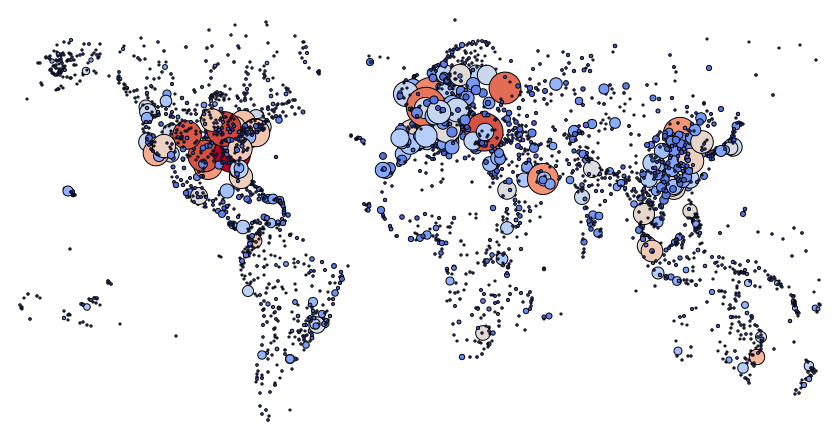

In [13]:
# edges not displayed
pagerank = PageRank(damping_factor=0.85, solver='lanczos')
scores = pagerank.fit_transform(adjacency)
image = svg_graph(adjacency, position, scores=scores, width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

In [14]:
#List the 10 best ranked airports, and compare with the 10 airports of highest traffic.
print("10 highest ranks ", names[top_k(scores, 10)])

10 highest ranks  ['Hartsfield Jackson Atlanta International Airport'
 "Chicago O'Hare International Airport"
 'Dallas Fort Worth International Airport' 'Atatürk International Airport'
 'Denver International Airport' 'Domodedovo International Airport'
 'Charles de Gaulle International Airport'
 'Frankfurt am Main International Airport' 'Amsterdam Airport Schiphol'
 'Dubai International Airport']


In [15]:
#10 airports of highest traffic.
d = adjacency_weighted@np.ones(adjacency_weighted.shape[0])
print("10 highest traffic ", names[top_k(d, 10)])

10 highest traffic  ['Amsterdam Airport Schiphol' 'Charles de Gaulle International Airport'
 'Dublin Airport' 'Munich International Airport'
 'Hartsfield Jackson Atlanta International Airport'
 'London Gatwick Airport' 'Frankfurt am Main International Airport'
 'Atatürk International Airport' 'Dallas Fort Worth International Airport'
 'Beijing Capital International Airport']


{1084: 'Tokyo Haneda International Airport'}


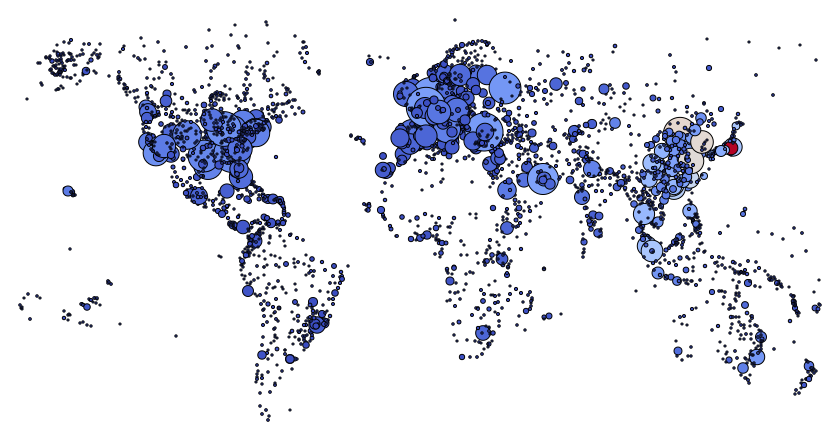

In [16]:
#Personalized PageRank starting from tokyo
print({i: name for i, name in enumerate(names) if 'Tokyo' in name})
pprank = PageRank(damping_factor=0.995)
scores = pprank.fit_transform(adjacency, {1084:1})
image = svg_graph(adjacency, position, scores=scores, width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

In [17]:
#10 best corresponding pages
print(names[top_k(scores, 10)])

['Tokyo Haneda International Airport'
 'Beijing Capital International Airport' 'Incheon International Airport'
 'Shanghai Pudong International Airport'
 'Taiwan Taoyuan International Airport'
 'Guangzhou Baiyun International Airport'
 'Chek Lap Kok International Airport' 'New Chitose Airport'
 'Singapore Changi Airport' 'Narita International Airport']


## 2. Digraphs

PageRank applies to directed graphs as well. In fact, it was originally designed for the Web graph, which is a directed graph.

## Wikipedia Vitals

In [18]:
graph = wikivitals
adjacency = graph.adjacency
names = graph.names

* List the 10 best ranked pages of Wikipedia Vitals.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees. Interpret the results.
* Which article of Wikipedia Vitals is in the top-20 of PageRank but not in the top-20 of in-degrees?

In [19]:
#top 10 ranked pages of wikipedia vitals
pr = PageRank(damping_factor=0.85)
scores = pr.fit_transform(adjacency)
print("10 highest ranks \n", names[top_k(scores, 10)])

10 highest ranks 
 ['Bibliothèque nationale de France' 'United States'
 'Geographic coordinate system' 'The New York Times' 'France' 'India'
 'Latin' 'China' 'United Kingdom' 'World War II']


In [20]:
d_out = adjacency.dot(np.ones(adjacency.shape[0]))
d_in = adjacency.T.dot(np.ones(adjacency.shape[0]))
print("10 highest out degree \n", names[top_k(d_out, 10)])

10 highest out degree 
 ['Europe' 'Modern history' 'History of the world' 'France' 'Africa'
 'History of art' 'Asia' 'Russia' 'History of Europe' 'South America']


In [21]:
print("10 highest in degree \n", names[top_k(d_in, 10)])

10 highest in degree 
 ['Bibliothèque nationale de France' 'United States' 'India' 'China'
 'The New York Times' 'France' 'Geographic coordinate system'
 'United Kingdom' 'World War II' 'Latin']


In [22]:
#in top-20 of PageRank but not in the top-20 of in-degrees?
names[list(set(top_k(scores, 20)) - set(top_k(d_in, 20)))]

array(['Greek language'], dtype='<U62')

* List the 20 closest pages to **Pablo Picasso** in Wikipedia Vitals. What is the best ranked painter other than Picasso?
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.

In [23]:
#20 closest pages to Pablo Picasso in Wikipedia Vitals
seeds = {int(np.argwhere(names == 'Pablo Picasso')):1}
scores = pagerank.fit_transform(adjacency, seeds)
names[top_k(scores, 20)]

array(['Pablo Picasso', 'Bibliothèque nationale de France',
       'The New York Times', 'Paris', 'Modernism', 'Museum of Modern Art',
       'Cubism', 'Avant-garde', 'Symbolism (arts)', 'Impressionism',
       'Romanticism', 'Spain', 'France', 'Metropolitan Museum of Art',
       'Surrealism', 'United States', 'Geographic coordinate system',
       'Vincent van Gogh', 'World War II', 'Paul Cézanne'], dtype='<U62')

In [24]:
#20 closest pages to both cat and dog
seeds = {int(np.argwhere(names == 'Cat')):0.5, int(np.argwhere(names == 'Dog')):0.5 }
scores = pagerank.fit_transform(adjacency, seeds)
names[top_k(scores, 20)]

array(['Dog', 'Cat', 'Bibliothèque nationale de France',
       'Taxonomy (biology)', 'Animal', 'Mammal', 'Chordate',
       'Middle Ages', 'India', 'The New York Times', 'China', 'Latin',
       'United States', 'Pinniped', 'Lion', 'Bear', 'Carl Linnaeus',
       'Leopard', 'Polar bear', 'Brown bear'], dtype='<U62')

## 3. Bigraphs

PageRank is less frequently used for bipartite graphs. It is very useful in this case as well.

## Cinema

In [25]:
graph = cinema

In [26]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* List the top-10 movies in terms of PageRank.
* List the 5 closest movies to **Mon Oncle**. 
* List the 5 closest actors to **Catherine Deneuve**.

In [27]:
pagerank = BiPageRank()

In [28]:
scores = pagerank.fit_transform(biadjacency)
print("top 10 movies in term of pagerank \n", movies[top_k(scores, 10)])

top 10 movies in term of pagerank 
 ['The Walking Dead (TV series)' 'Tatort' 'Twin Peaks'
 'Homeland (TV series)' 'House of Cards (U.S. TV series)' 'Prêt-à-Porter'
 'St. Elsewhere' 'Peaky Blinders (TV series)' 'Seances'
 'Arrow (TV series)']


In [29]:
seeds = {int(np.argwhere(movies == 'Mon Oncle')):1}
scores = pagerank.fit_transform(biadjacency, seeds)
print("5 closest movies to Mon Oncle \n", movies[top_k(scores, 6)])

5 closest movies to Mon Oncle 
 ['Mon Oncle' 'Jour de fête' 'Cours du soir' 'Gai dimanche'
 'Touchez pas au grisbi' 'The Discreet Charm of the Bourgeoisie']


In [30]:
seeds = {int(np.argwhere(actors == 'Catherine Deneuve')):1}
scores = pagerank.fit_transform(biadjacency.T.tocsr(), seeds)
print("5 closest actors to Catherine Deneuve. \n", actors[top_k(scores, 6)])

5 closest actors to Catherine Deneuve. 
 ['Catherine Deneuve' 'Marcello Mastroianni' 'Gérard Depardieu'
 'Michel Piccoli' 'Chiara Mastroianni' 'Jean-Louis Trintignant']


## 4. Digraphs as bigraphs

Directed graphs can be represented as bipartite graphs by duplicating each node, one as source of edges and the other as destination of edges. The biadjacency matrix of the bipartite graph is simply the adjacency matrix of the directed graph. 

The PageRank scores obtained with the bipartite graph differ from those obtained with the directed graph: they correspond to the **forward-backward** random walk in the directed graph, edges being alternately followed in forward and backward directions.

## Wikipedia Vitals

In [31]:
graph = wikivitals

In [32]:
adjacency = graph.adjacency
names = graph.names

In [33]:
np.unique(adjacency.data)

array([ True])

What is the closest painter to Pablo Picasso (other than himself) in terms of Personalized BiPageRank in WikiVitals?

In [35]:
#identify him, it's paul klee
pagerank = BiPageRank()
bidajacency = adjacency
seeds = {int(np.argwhere(names == 'Pablo Picasso')):1}
scores = pagerank.fit_transform(biadjacency, seeds)
#names[top_k(scores, 15)]

## To do

Do the same experiments as above using BiPageRank:
* List the 10 best ranked pages of Wikipedia Vitals. Give 2 rankings: one for rows, the other for columns.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees. Interpret the results.

In [36]:
pagerank = BiPageRank()
#for rows
biadjacency = adjacency
scores = pagerank.fit_transform(biadjacency)
print("best 10 ranked pages in wikivitals as bipartite, rows \n\n", names[top_k(scores, 10)])
#for cols, we use the transpose of this biadjacency matrix to obtain the biadjacency matrix when parts are inverted
scores = pagerank.fit_transform(biadjacency.T.tocsr())
print("\nbest 10 ranked pages in wikivitals as bipartite, cols \n\n", names[top_k(scores, 10)])

best 10 ranked pages in wikivitals as bipartite, rows 

 ['Europe' 'History of the world' 'Modern history' 'France' 'Africa'
 'History of art' 'United States' 'Russia' 'Asia' 'History of Europe']

best 10 ranked pages in wikivitals as bipartite, cols 

 ['Bibliothèque nationale de France' 'United States' 'India'
 'The New York Times' 'China' 'France' 'Geographic coordinate system'
 'World War II' 'United Kingdom' 'Latin']


In [37]:
print("10 highest out degree \n\n", names[top_k(biadjacency.dot(np.ones(biadjacency.shape[1])), 10)])

10 highest out degree 

 ['Europe' 'Modern history' 'History of the world' 'France' 'Africa'
 'History of art' 'Asia' 'Russia' 'History of Europe' 'South America']


In [38]:
print("10 highest in degree \n\n", names[top_k(biadjacency.T.tocsr().dot(np.ones(biadjacency.shape[0])), 10)])

10 highest in degree 

 ['Bibliothèque nationale de France' 'United States' 'India' 'China'
 'The New York Times' 'France' 'Geographic coordinate system'
 'United Kingdom' 'World War II' 'Latin']


## To do

Using BiPageRank:
* List the 20 closest pages to **Picasso** in Wikipedia Vitals. 
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.

In your opinion, what is the best algorithm for content recommendation, PageRank or BiPageRank?<br>
Justify your answer.

In [39]:
pagerank = BiPageRank()
biadjacency = wikivitals.adjacency
seeds = {int(np.argwhere(wikivitals.names=='Pablo Picasso')):1}
scores = pagerank.fit_transform(biadjacency, seeds)
print("20 closest pages to Picasso in Wikipedia Vitals. \n \n", names[top_k(scores, 22)])

20 closest pages to Picasso in Wikipedia Vitals. 
 
 ['Pablo Picasso' 'Modernism' 'Cubism' 'Modern art'
 'Abstract expressionism' 'Impressionism' 'Surrealism' 'Futurism'
 'Symbolism (arts)' 'Expressionism' 'Pop art' 'Avant-garde'
 'Postmodernism' 'Paul Klee' 'Dada' 'Minimalism' 'Thomas Mann'
 'Modern architecture' 'Franz Kafka' '20th-century classical music'
 'Rainer Maria Rilke' 'Wassily Kandinsky']


In [40]:
pagerank = BiPageRank()
biadjacency = wikivitals.adjacency
seeds = {int(np.argwhere(wikivitals.names=='Cat')):0.5, int(np.argwhere(wikivitals.names=='Dog')):0.5}
scores = pagerank.fit_transform(biadjacency, seeds)
print("20 closest pages to Cat & Dog in Wikipedia Vitals. \n\n", names[top_k(scores, 22)])

20 closest pages to Cat & Dog in Wikipedia Vitals. 

 ['Dog' 'Cat' 'Bear' 'Brown bear' 'Pinniped' 'Coyote' 'Wolf'
 'European badger' 'Tiger' 'Lion' 'Cougar' 'Cheetah' 'Polar bear'
 'Leopard' 'Stoat' 'Jaguar' 'Carnivora' 'Wolverine' 'Felidae'
 'Snow leopard' 'Sea otter' 'Hyena']
